# New York City Taxi Fare Prediction

The task is to predict the fare amount (inclusive of tolls) for a taxi ride in New York City given the pickup and dropoff locations.  While I can get a basic estimate based on just the distance between the two points, this will result in an RMSE of $5-$8, depending on the model used. The challenge is to do better than this using Machine Learning techniques!

All datasets and the task itself were taken from the Kaggle playground competition, I do not own any of them.

## New York City Taxi Fare Prediction Analysis


First we need to look at the data:

In [11]:
# load some default Python modules
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
plt.style.use('seaborn-whitegrid')



In [12]:
# read training data with limiting to the rows, as the file is big

tax_train = pd.read_csv("train.csv", nrows = 2_000)

#and checking what columns the data table hasre
tax_train.columns.to_list()

['key',
 'fare_amount',
 'pickup_datetime',
 'pickup_longitude',
 'pickup_latitude',
 'dropoff_longitude',
 'dropoff_latitude',
 'passenger_count']

In [18]:
# i can also check how the table would look like and get the shape of the dataframe
print(tax_train.shape)
tax_train.head()

(2000, 8)


,key,fare_amount,pickup_datetime,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,passenger_count
0,2009-06-15 17:26:21.0000001,4.5,2009-06-15 17:26:21 UTC,-73.844311,40.721319,-73.841610,40.712278,1
1,2010-01-05 16:52:16.0000002,16.9,2010-01-05 16:52:16 UTC,-74.016048,40.711303,-73.979268,40.782004,1
2,2011-08-18 00:35:00.00000049,5.7,2011-08-18 00:35:00 UTC,-73.982738,40.761270,-73.991242,40.750562,2
3,2012-04-21 04:30:42.0000001,7.7,2012-04-21 04:30:42 UTC,-73.987130,40.733143,-73.991567,40.758092,1
4,2010-03-09 07:51:00.000000135,5.3,2010-03-09 07:51:00 UTC,-73.968095,40.768008,-73.956655,40.783762,1


Then I take a look into the test set to see how the columns look like there

In [14]:
# Read test data

tax_test = pd.read_csv("test.csv", nrows = 2_000)

#and checking what columns the data table has
tax_test.columns.to_list()

['key',
 'pickup_datetime',
 'pickup_longitude',
 'pickup_latitude',
 'dropoff_longitude',
 'dropoff_latitude',
 'passenger_count']

As I can see there is no `fare_amount` column, as I need to predict that column. The rest of the columns are in place.

After looking at the data, I need to determine a problem. I need to determine a model, to understand what kind of Machine Learning model to use.

I start with creating a histogramm of the data:

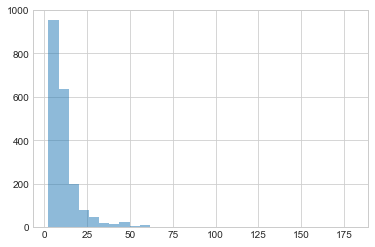

In [19]:
# Plot a histogram
tax_train.fare_amount.hist(bins=30, alpha=0.5)
plt.show()

From histogram I can see, that the `fare_amount` is a contionous variable, therefore I am dealing with the regression problem.